In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
ship_ds = pd.read_csv('shipping_destination.csv')
ship_ds

,order-id,city,state,country,postal_code,market,region
0,CA-2013-103982,Round Rock,Texas,United States,78664.0,US,Central
1,ES-2012-2960821,Parla,Madrid,Spain,NaN,EU,South
2,ES-2014-5334183,Garforth,England,United Kingdom,NaN,EU,North
3,CA-2011-128055,San Francisco,California,United States,94122.0,US,West
4,ES-2014-2697033,Paris,Ile-de-France,France,NaN,EU,Central
...,...,...,...,...,...,...,...
25719,MX-2012-105662,Toluca,México,Mexico,NaN,LATAM,North
25720,CA-2014-141481,Los Angeles,California,United States,90036.0,US,West
25721,IN-2011-73132,Brisbane,Queensland,Australia,NaN,APAC,Oceania
25722,US-2013-147991,Chattanooga,Tennessee,United States,37421.0,US,South


In [3]:
pro= pd.read_csv('product.csv')
pro

,product_id,category,sub_category,product_name
0,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...
1,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black"
2,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID"
3,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless"
4,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed"
...,...,...,...,...
10763,OFF-FA-10004112,Office Supplies,Fasteners,"Stockwell Staples, 12 Pack"
10764,OFF-BI-10003253,Office Supplies,Binders,"Ibico Index Tab, Economy"
10765,OFF-BI-10002510,Office Supplies,Binders,"Acco Index Tab, Clear"
10766,FUR-ADV-10002329,Furniture,Furnishings,"Advantus Light Bulb, Erganomic"


In [4]:
cus= pd.read_csv('customer.csv')
cus

,customer_id,customer_name,segment
0,AA-10315,Alex Avila,Consumer
1,AA-10375,Allen Armold,Consumer
2,AA-10480,Andrew Allen,Consumer
3,AA-10645,Anna Andreadi,Consumer
4,AA-315,Alex Avila,Consumer
...,...,...,...
1585,YS-21880,Yana Sorensen,Corporate
1586,ZC-11910,Zuschuss Carroll,Consumer
1587,ZC-21910,Zuschuss Carroll,Consumer
1588,ZD-11925,Zuschuss Donatelli,Consumer


In [5]:
tf_2011= pd.read_csv('trans_fact_2011.csv')
tf_2011

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority
0,49,MX-2011-127145,12-06-2011,17-06-2011,Standard Class,SF-20200,FUR-FU-10003608,26.76000,2,0.000,7.48000,2.04,High
1,51,MX-2011-168662,13-10-2011,18-10-2011,Second Class,KC-16255,OFF-SU-10003665,66.88000,4,0.000,28.72000,3.36,Medium
2,52,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10003142,230.67252,3,0.402,-85.64748,9.81,Medium
3,53,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10001756,172.43928,3,0.402,-3.48072,5.57,Medium
4,54,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,OFF-AP-10004958,683.49600,3,0.400,-79.76400,50.13,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,51200,TU-2011-3440,14-06-2011,19-06-2011,Standard Class,KH-6690,OFF-ELD-10001037,37.63200,2,0.600,-19.78800,0.09,High
8994,51201,TU-2011-3440,14-06-2011,19-06-2011,Standard Class,KH-6690,OFF-STA-10000054,4.52400,1,0.600,-5.79600,0.36,High
8995,51202,TU-2011-3440,14-06-2011,19-06-2011,Standard Class,KH-6690,TEC-BEL-10003875,93.04800,2,0.600,-69.79200,19.29,High
8996,51269,TU-2011-700,22-08-2011,22-08-2011,Same Day,DP-3000,OFF-XER-10003104,5.37600,1,0.600,-6.05400,0.73,High


In [10]:
merged_df = pd.merge(cus, tf_2011, on='customer_id', how='outer')
merged_df2 = pd.merge(merged_df, ship_ds , on='order_id', how='outer')
merged_df = pd.merge(merged_df, pro, on='product_id', how='outer')

In [8]:
ship_ds = ship_ds.rename(columns={'order-id': 'order_id'})

In [9]:
ship_ds.columns

Index(['order_id', 'city', 'state', 'country', 'postal_code', 'market',
       'region'],
      dtype='object')

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     10132 non-null  object 
 1   customer_name   10132 non-null  object 
 2   segment         10132 non-null  object 
 3   row_id          9851 non-null   float64
 4   order_id        9851 non-null   object 
 5   order_date      9851 non-null   object 
 6   ship_date       9851 non-null   object 
 7   ship_mode       9851 non-null   object 
 8   product_id      14554 non-null  object 
 9   sales           9851 non-null   float64
 10  quantity        9851 non-null   float64
 11  discount        9851 non-null   float64
 12  profit          9851 non-null   float64
 13  shipping_cost   9851 non-null   float64
 14  order_priority  9851 non-null   object 
 15  category        14554 non-null  object 
 16  sub_category    14554 non-null  object 
 17  product_name    14554 non-null 

In [13]:
merged_df.describe()

,row_id,sales,quantity,discount,profit,shipping_cost
count,9851.000000,9851.000000,9851.000000,9851.000000,9851.000000,9851.000000
mean,25755.953609,253.603197,3.515988,0.147428,27.736044,27.271401
std,14471.440403,538.067396,2.280356,0.214430,170.305154,59.499153
min,49.000000,0.852000,1.000000,0.000000,-3701.892800,0.020000
25%,13542.000000,30.850500,2.000000,0.000000,0.000000,2.680000
50%,26178.000000,84.960000,3.000000,0.000000,9.072000,7.880000
75%,37722.500000,254.917000,5.000000,0.200000,36.393000,24.765000
max,51290.000000,22638.480000,14.000000,0.800000,4630.475500,894.770000


In [19]:

pip install pandasql

  Using cached pandasql-0.7.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [20]:
from pandasql import sqldf

In [22]:
# query_1 = """
# SELECT product_name 
# FROM merged_df
# group by order_id;
# """
# result_1 = run_query(query_1)
# # print(result_1)
merged_df.head()

,customer_id,customer_name,segment,row_id,order_id,order_date,ship_date,ship_mode,product_id,sales,quantity,discount,profit,shipping_cost,order_priority,category,sub_category,product_name
0,AA-10315,Alex Avila,Consumer,7998.0,MX-2011-114685,24-11-2011,26-11-2011,Second Class,TEC-PH-10000599,339.36,3.0,0.0,152.70,44.69,High,Technology,Phones,"Samsung Audio Dock, Cordless"
1,AA-10315,Alex Avila,Consumer,7999.0,MX-2011-114685,24-11-2011,26-11-2011,Second Class,OFF-BI-10004145,9.06,3.0,0.0,3.66,1.06,High,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy"
2,JK-16090,Juliana Krohn,Consumer,6123.0,MX-2011-127670,19-10-2011,23-10-2011,Standard Class,OFF-BI-10004145,18.12,6.0,0.0,7.32,0.49,Medium,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy"
3,AA-10315,Alex Avila,Consumer,8000.0,MX-2011-114685,24-11-2011,26-11-2011,Second Class,OFF-BI-10004195,50.50,5.0,0.0,3.50,4.95,High,Office Supplies,Binders,"Wilson Jones Binding Machine, Clear"
4,AA-10315,Alex Avila,Consumer,8000.0,MX-2011-114685,24-11-2011,26-11-2011,Second Class,OFF-BI-10004195,50.50,5.0,0.0,3.50,4.95,High,Office Supplies,Binders,"Ibico Binder Covers, Durable"


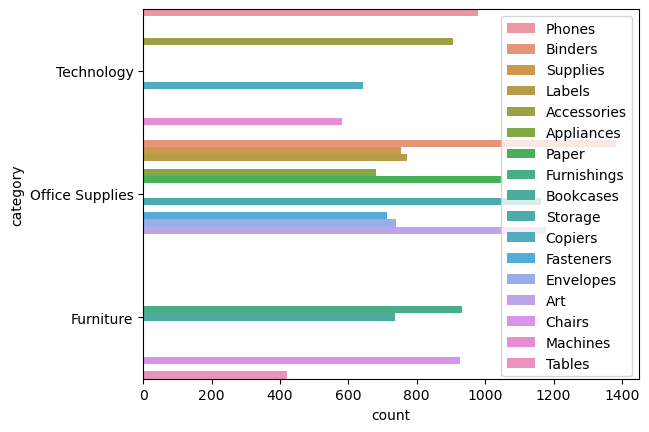

In [50]:
import matplotlib.pyplot as plt
ax=sns.countplot (merged_df, y="category", hue="sub_category", width =1, fill= True)
plt.legend(loc='upper right')

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

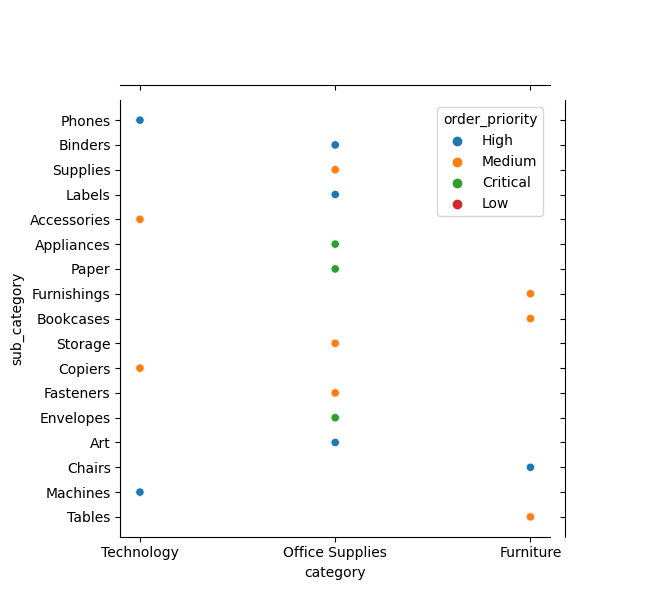

In [34]:
sns.jointplot(data=merged_df, x="category", y="sub_category", hue="order_priority")